In [1]:
import os
import pandas as pd

from collections import Counter

ONCOKB_DIR = '/home/moored2/shared_data_folder/moored2/impact_exploration/oncokb-annotated-msk-impact'
IMPACT_DIR = '/home/moored2/shared_data_folder/moored2/impact_exploration/msk-impact/msk_solid_heme'

In [2]:
okb_impact_filename = os.path.join(ONCOKB_DIR, 'data_clinical_sample.oncokb.txt')
okb_impact_df = pd.read_csv(okb_impact_filename, sep='\t')

/tmp/ipykernel_1294315/951799358.py:2: DtypeWarning: Columns (15,43) have mixed types. Specify dtype option on import or set low_memory=False.
  okb_impact_df = pd.read_csv(okb_impact_filename, sep='\t')


In [3]:
patient_filename = os.path.join(IMPACT_DIR,'data_clinical_patient.txt')
patient_df = pd.read_csv(patient_filename, skiprows=3, sep='\t', header=1)

/tmp/ipykernel_1294315/2198061301.py:2: DtypeWarning: Columns (24) have mixed types. Specify dtype option on import or set low_memory=False.
  patient_df = pd.read_csv(patient_filename, skiprows=3, sep='\t', header=1)


In [4]:
df = okb_impact_df.merge(patient_df, on="PATIENT_ID")

In [5]:
def create_count_df(field):
    _keys = Counter(field).keys()
    _vals = Counter(field).values()

    _df = pd.DataFrame({'Keys': _keys, 'Amount': _vals})
    _df.sort_values(by=['Amount'], ascending=False)

    return _df

def plot_df(graph_df, graph_title):
    return graph_df.plot.bar(x="Keys", y="Amount", title=graph_title)

In [6]:
df.columns

Index(['SAMPLE_ID', 'PATIENT_ID', 'GLEASON_SAMPLE_LEVEL', 'PDL1_POSITIVE',
       'MONTH_ADDED', 'WEEK_ADDED', 'CANCER_TYPE', 'SAMPLE_TYPE',
       'SAMPLE_CLASS', 'METASTATIC_SITE', 'PRIMARY_SITE',
       'CANCER_TYPE_DETAILED', 'GENE_PANEL', 'SO_COMMENTS', 'SAMPLE_COVERAGE',
       'TUMOR_PURITY', 'ONCOTREE_CODE', 'MSI_COMMENT', 'MSI_SCORE', 'MSI_TYPE',
       'INSTITUTE', 'SOMATIC_STATUS', 'ARCHER', 'CVR_TMB_COHORT_PERCENTILE',
       'CVR_TMB_SCORE', 'CVR_TMB_TT_COHORT_PERCENTILE', 'PATH_SLIDE_EXISTS',
       'MSK_SLIDE_ID', 'LEVEL_1', 'LEVEL_2', 'LEVEL_3A', 'LEVEL_3B', 'LEVEL_4',
       'LEVEL_R1', 'LEVEL_R2', 'HIGHEST_LEVEL', 'HIGHEST_SENSITIVE_LEVEL',
       'HIGHEST_RESISTANCE_LEVEL', 'LEVEL_Dx1', 'LEVEL_Dx2', 'LEVEL_Dx3',
       'HIGHEST_DX_LEVEL', 'LEVEL_Px1', 'LEVEL_Px2', 'LEVEL_Px3',
       'HIGHEST_PX_LEVEL', 'ONCOGENIC_MUTATIONS', '#ONCOGENIC_MUTATIONS',
       'RESISTANCE_MUTATIONS', '#RESISTANCE_MUTATIONS',
       '#MUTATIONS_WITH_SENSITIVE_THERAPEUTIC_IMPLICATIONS',
  

In [7]:
cancer_df = create_count_df(df['CANCER_TYPE'])

In [8]:
cancer_df

,Keys,Amount
0,Non-Small Cell Lung Cancer,17266
1,Breast Cancer,10202
2,Endometrial Cancer,4074
3,Bladder Cancer,4406
4,Hepatobiliary Cancer,2482
...,...,...
85,Melanocytoma,6
86,Undifferentiated Embryonal Sarcoma of the Liver,6
87,Lacrimal Gland Tumor,5
88,Large Cell/Anaplastic Medulloblastoma,2


<AxesSubplot: title={'center': 'CANCER_TYPE'}, xlabel='Keys'>

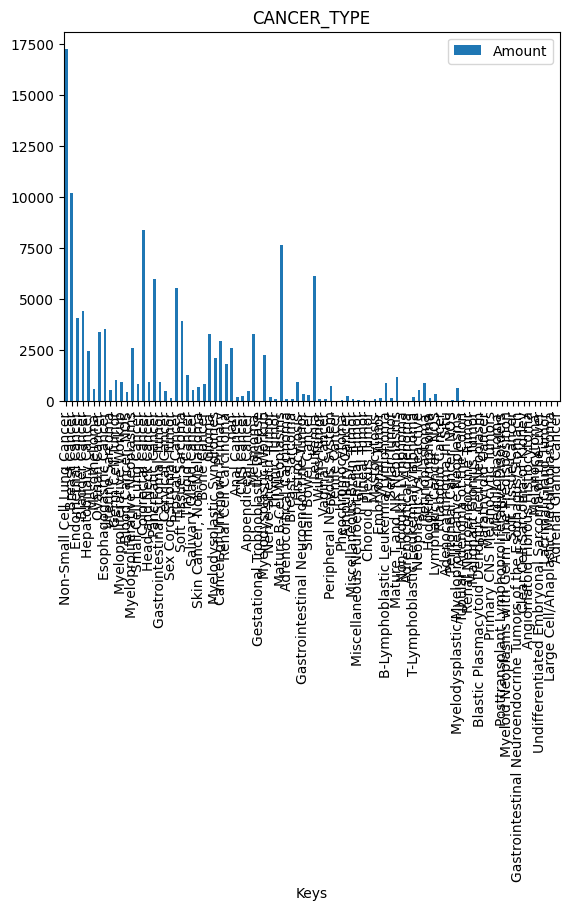

In [9]:
plot_df(cancer_df, "CANCER_TYPE")

In [10]:
cancer_detailed_df = create_count_df(df['CANCER_TYPE_DETAILED'])

In [11]:
cancer_detailed_df

,Keys,Amount
0,Lung Adenocarcinoma,13570
1,Breast Invasive Ductal Carcinoma,5781
2,Uterine Serous Carcinoma/Uterine Papillary Ser...,629
3,Uterine Endometrioid Carcinoma,2181
4,Bladder Urothelial Carcinoma,3368
...,...,...
726,Aggressive Angiomyxoma,2
727,Proliferating Pilar Cystic Tumor,1
728,Spindle Cell Oncocytoma of the Adenohypophysis,1
729,"Ovarian Choriocarcinoma, NOS",1


<AxesSubplot: title={'center': 'CANCER_TYPE_DETAILED'}, xlabel='Keys'>

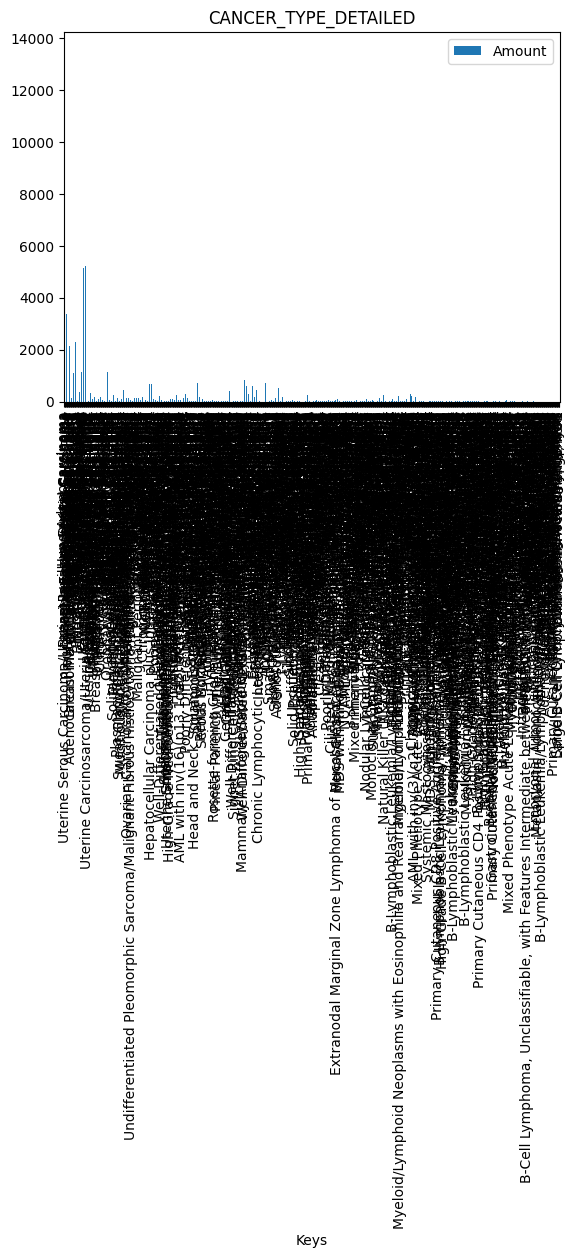

In [12]:
plot_df(cancer_detailed_df, "CANCER_TYPE_DETAILED")

In [13]:
race_df = create_count_df(df['RACE'])

In [14]:
race_df

,Keys,Amount
0,WHITE,92179
1,OTHER,3680
2,ASIAN-FAR EAST/INDIAN SUBCONT,9787
3,BLACK OR AFRICAN AMERICAN,8326
4,PT REFUSED TO ANSWER,3695
5,NATIVE AMERICAN-AM IND/ALASKA,161
6,UNKNOWN,1435
7,NO VALUE ENTERED,2030
8,NATIVE HAWAIIAN OR PACIFIC ISL,76
9,Unknown,66


<AxesSubplot: title={'center': 'RACE'}, xlabel='Keys'>

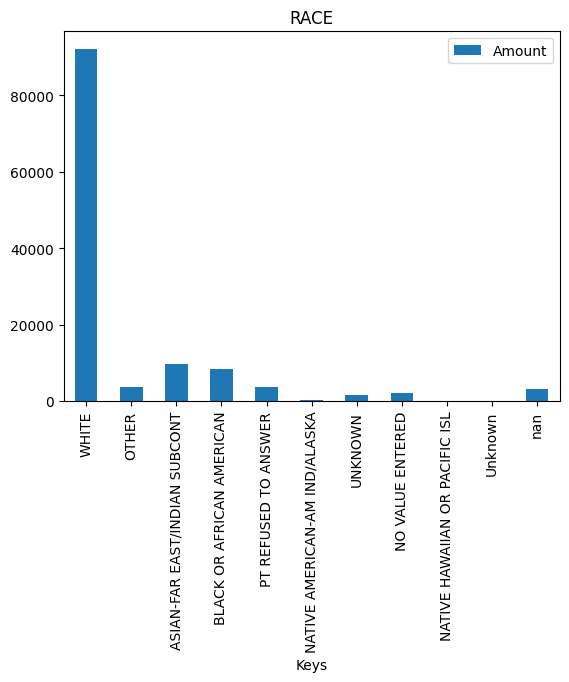

In [15]:
plot_df(race_df, 'RACE')

In [16]:
ethnicity_df = create_count_df(df['ETHNICITY'])

In [17]:
ethnicity_df

,Keys,Amount
0,Non-Spanish; Non-Hispanic,102167
1,Unknown whether Spanish or not,7010
2,"Spanish NOS; Hispanic NOS, Latino NOS",6819
3,Mexican (includes Chicano),63
4,Dominican Republic,214
5,South/Central America (except Brazil),497
6,Puerto Rican,297
7,NaN,3065
8,Cuban,78
9,Spanish surname only,14


<AxesSubplot: title={'center': 'ETHNICITY'}, xlabel='Keys'>

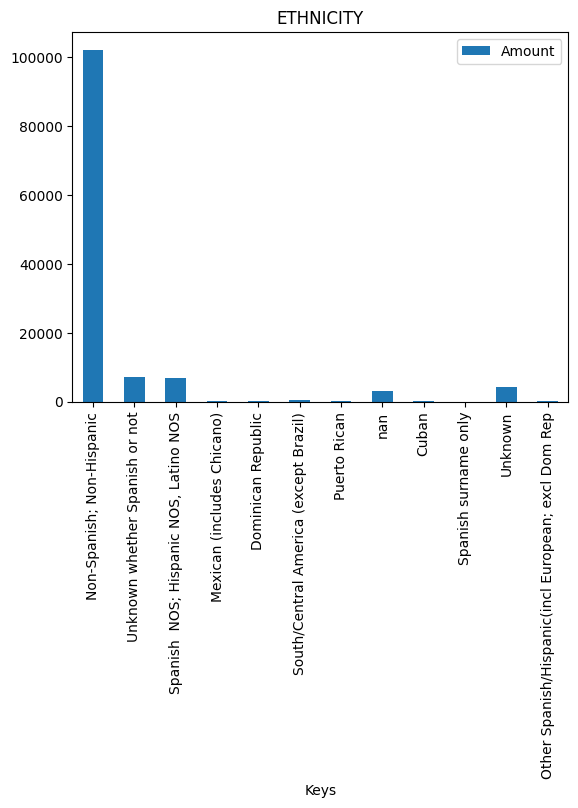

In [18]:
plot_df(ethnicity_df, 'ETHNICITY')

In [19]:
stage_df = create_count_df(df['STAGE_HIGHEST_RECORDED'])

In [20]:
stage_df

,Keys,Amount
0,Stage 1-3,70479
1,Unknown,20833
2,Stage 4,30123
3,NaN,3041


<AxesSubplot: title={'center': 'STAGE_HIGHEST_RECORDED'}, xlabel='Keys'>

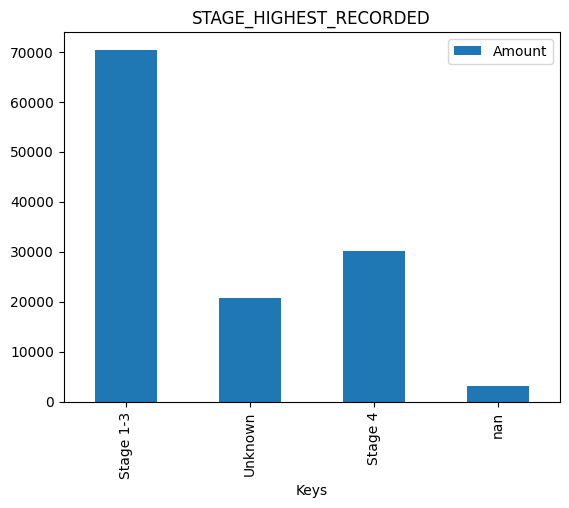

In [21]:
plot_df(stage_df, "STAGE_HIGHEST_RECORDED")

In [22]:
gender_df = create_count_df(df['GENDER'])

In [23]:
gender_df

,Keys,Amount
0,FEMALE,63385
1,MALE,57984
2,Unknown,66
3,NaN,3041


<AxesSubplot: title={'center': 'GENDER'}, xlabel='Keys'>

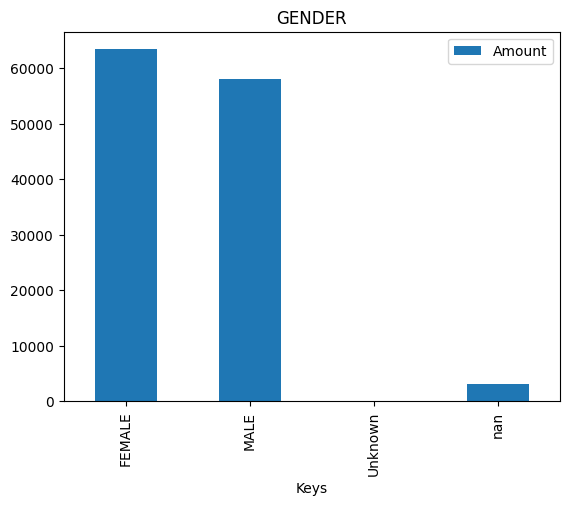

In [24]:
plot_df(gender_df, 'GENDER')

In [25]:
age_df = create_count_df(df['CURRENT_AGE_DEID'])

<AxesSubplot: title={'center': 'CURRENT_AGE_DEID'}, xlabel='Keys'>

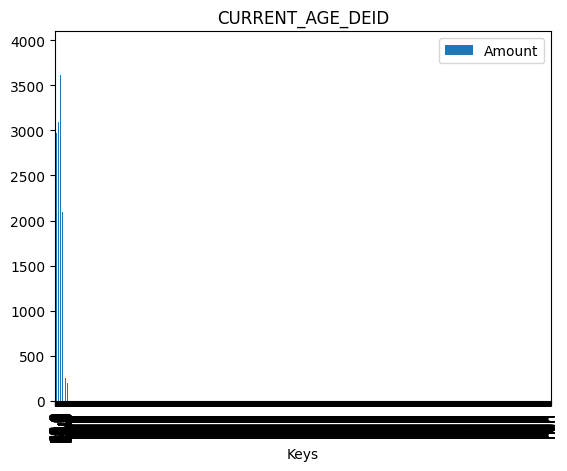

In [26]:
plot_df(age_df, 'CURRENT_AGE_DEID')

In [27]:
metastatic_df = create_count_df(df['METASTATIC_SITE'])

In [28]:
metastatic_df

,Keys,Amount
0,Neck,204
1,Not Applicable,85368
2,Liver,6102
3,Peritoneum,843
4,Pelvis,452
...,...,...
504,"Trachea,Esophagus",1
505,Paravertebral soft tissue,1
506,Left calf,1
507,Ampulla,2


<AxesSubplot: title={'center': 'METASTATIC_SITE'}, xlabel='Keys'>

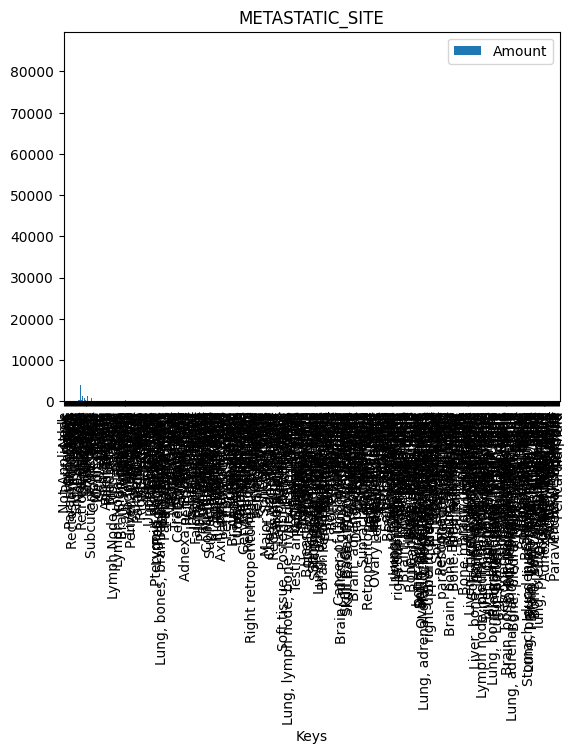

In [29]:
plot_df(metastatic_df, 'METASTATIC_SITE')

In [30]:
primary_df = create_count_df(df['PRIMARY_SITE'])

In [31]:
primary_df

,Keys,Amount
0,Lung,16021
1,Breast,9829
2,Uterus,3766
3,Bladder,3572
4,Liver,1350
...,...,...
445,small bowel,1
446,ampulla,1
447,cheek,1
448,"Anus,Rectum",1


<AxesSubplot: title={'center': 'PRIMARY_SITE'}, xlabel='Keys'>

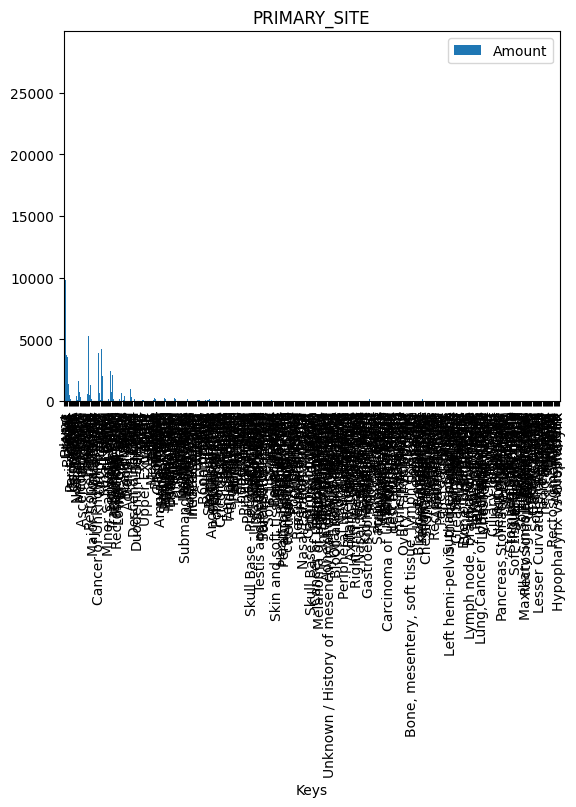

In [32]:
plot_df(primary_df, 'PRIMARY_SITE')